Spaceship Titanic
---

[Kaggle Competition](https://www.kaggle.com/competitions/spaceship-titanic)

>To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.


>Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

>Submission Format
>The submission format for the competition is a csv file with the following format:

| PassengerId | Transported |
| --- | --- |
|0013_01|False|
|0018_01|False|
|0019_01|False|
|0021_01|False|
etc.


File and Data Field Descriptions
---
### `train.csv` 
Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

---
### `test.csv` 
Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

---
### `sample_submission.csv`
A submission file in the correct format.

`PassengerId` - Id for each passenger in the test set.

`Transported` - The target. For each passenger, predict either True or False.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [2]:
#import data
data_directory = './data/'

df_train = pd.read_csv(data_directory + 'train.csv')
df_test = pd.read_csv( data_directory + 'test.csv')
df_example = pd.read_csv(data_directory + 'sample_submission.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

In [3]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


---
## PassengerID

> A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [5]:
#no duplicate ids
df['PassengerId'].duplicated().sum()

0

In [6]:
#no null ids
df['PassengerId'].isna().sum()

0

In [7]:
# do all ids adhere to the format gggg_pp
df['PassengerId_format_ok'] = df['PassengerId'].apply(lambda this_id: int(this_id[:4]) < 10000 and int(this_id[-2:]) < 100 and this_id[4] == '_')

In [8]:
#all Ids are good.
df['PassengerId_format_ok'].value_counts()

True    12970
Name: PassengerId_format_ok, dtype: int64

In [9]:
#make column for passenger group
df['Group'] = df['PassengerId'].apply(lambda this_id: int(this_id[:4]))

In [10]:
#make column for passenger number in group
df['GroupRank'] = df['PassengerId'].apply(lambda this_id: this_id[-2:])

### Group

<BarContainer object of 8 artists>

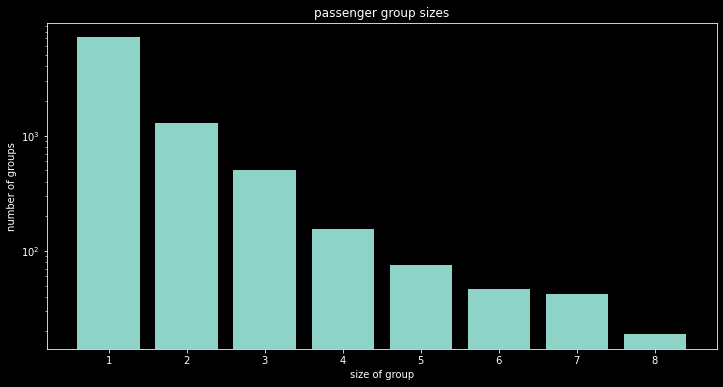

In [11]:
#group sizes
group_value_counts = df['Group'].value_counts()
df['GroupSize'] = df['Group'].apply(lambda this_group: int(group_value_counts[this_group]) )

plt.figure(figsize = (12,6))
plt.title('passenger group sizes')
plt.xlabel('size of group')
plt.ylabel('number of groups')
sizes = df['Group'].value_counts().value_counts().values
plt.bar(height = sizes, x= range(1,9), log = True)

In [12]:
# how are groups numbered?
group_size_corr = df[['Group', "GroupSize"]].corr()
group_size_corr

Group  GroupSize
Group      1.000000   0.007881
GroupSize  0.007881   1.000000

The group size is not related to the group number.

<AxesSubplot:xlabel='Group', ylabel='GroupSize'>

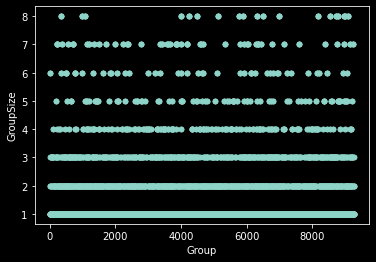

In [13]:
#group size with group number scatter
df.plot(x = 'Group', y = 'GroupSize', kind = 'scatter')

Text(0.5, 1.0, 'group number with index')

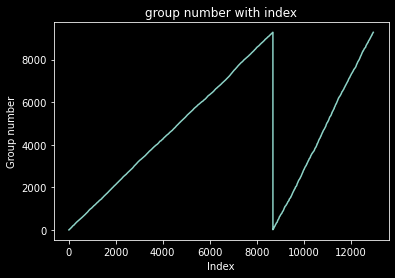

In [14]:
df['Group'].plot()
plt.xlabel("Index")
plt.ylabel('Group number')
plt.title("group number with index")

Passenger indices appear to be assigned by group number. The second ramp is the test set.

### GroupRank

<AxesSubplot:>

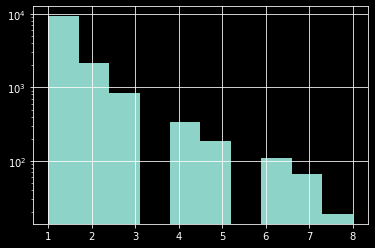

In [19]:
#make grouprank a number
df['GroupRank'] = df['GroupRank'].apply(lambda this_rank: int(this_rank))
df['GroupRank'].hist(log = True)